## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data
Please note that only NUMPY can be used to implement your model, you will get zero point by simply calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis

## Load data

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from numpy.linalg import inv

In [57]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [59]:
# m1, m2 are the mean vector for class 1 and 2

# m1 = (1/N1)*sum(x in C1), N1 = the number of points in C1
# m2 = (1/N2)*sum(x in C2), N2 = the number of points in C2
m1 = np.mean(x_train[y_train == 0], axis = 0)
m2 = np.mean(x_train[y_train == 1], axis = 0)

# M1, M2 are for fisher’s linear discriminant
M1 = m1.reshape(m1.shape[0], 1)
M2 = m2.reshape(m2.shape[0], 1)
# I also changed the shape of mean vectors to make it ready 
# for matrix multiplication later
m1 = m1.reshape(1, x_train.shape[1])
m2 = m2.reshape(1, x_train.shape[1])

In [60]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [[ 0.99253136 -0.99115481]] mean vector of class 2: [[-0.9888012   1.00522778]]


## 2. Compute the Within-class scatter matrix SW

In [61]:
# SW is the within-class covariance matrix
# SW = sum((x-m1)·(x-m1).T, x in C1) + sum((x-m2)·(x-m2).T, x in C2)

# first, we separate the data into class 1 and 2
x1 = x_train[y_train == 0]
x2 = x_train[y_train == 1]

# SW = sum((x-m1).T·(x-m1), x in C1) + sum((x-m2).T·(x-m2), x in C2)
# I changed the order of transpose to make the shape consistent
SW = np.dot((x1 - m1).T, (x1 - m1)) + np.dot((x2 - m2).T, (x2 - m2))

In [62]:
print(f"Within-class scatter matrix SW: {SW}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3. Compute the Between-class scatter matrix SB

In [63]:
# SB is the between-class covariance matrix
# SB = (m2 - m1)·(m2 - m1).T
# I changed the order the transpose to make the shape consistent

SB = np.dot((m2 - m1).T, (m2 - m1))

In [64]:
print(f"Between-class scatter matrix SB: {SB}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [65]:
# The optimal W is the eigenvector of inv(SW)·SB that corresponds to 
# the largest eigenvalue 

# compute inv(SW)·SB
inv_SW = np.linalg.inv(SW)
A = np.dot(inv_SW, SB)

# get eigenvalue and eigenvector
eigenvalue, eigenvector = np.linalg.eig(A)

# the optimal W is the eigenvector corresponds to the largest eigenvalue 
max_eigenvalue_index = np.argmax(eigenvector)
W = eigenvector[:, max_eigenvalue_index]
W = W.reshape(W.shape[0], 1) # reshape into n*1

In [66]:
print(f" Fisher’s linear discriminant: {W}")

 Fisher’s linear discriminant: [[ 0.37003809]
 [-0.92901658]]


## 5. Project the test data by linear discriminant and get the class prediction by K nearest-neighbor rule. Please report the accuracy score with K values from 1 to 5
you can use accuracy_score function from sklearn.metric.accuracy_score

In [67]:
# project data
train = np.dot(x_train, W)
test = np.dot(x_test, W)

In [68]:
# compute the distance of x1, x2
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

# for single element
def _predict(t, K):
    
    # compute the distance
    distances = [euclidean_distance(t, x) for x in train]
    # get the closest K
    K_indices = np.argsort(distances)[:K]
    K_nearest_labels = [y_train[i] for i in K_indices]
    # majority vote
    pred = max(K_nearest_labels, key = K_nearest_labels.count)
    return pred

# for whole set
def predict(X, K):
    y_pred = [_predict(x, K) for x in X]
    return y_pred

In [69]:
for i in range(1,6):
    y_pred = predict(test, i)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8488
Accuracy of test-set 0.8488
Accuracy of test-set 0.8792
Accuracy of test-set 0.8824
Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like this image

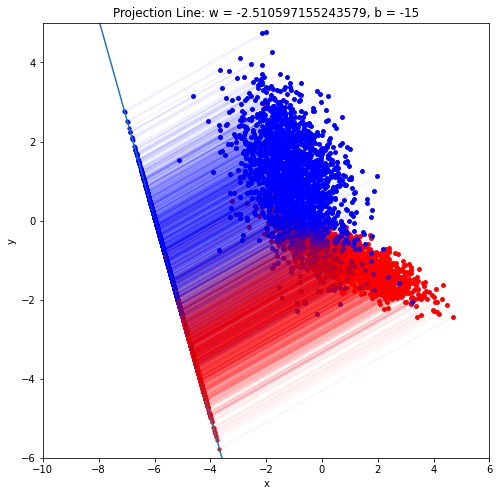

In [70]:
# set the width and height of output graph
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(-10, 6)
plt.ylim(-6, 5)


# draw projection line
slope = (W[1][0] / W[0][0])
x = np.linspace(-10, 6, 100)
y = x * slope - 15

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Projection Line: w = {slope}, b = -15')


# draw training data and their projections

# plot class1 training data as red dots 
x_c1, y_c1 = x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1]
plt.scatter(x_c1, y_c1, color='red', s=15, label='class1')

# plot class2 training data as blue dots
x_c2, y_c2 = x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1]
plt.scatter(x_c2, y_c2, color='blue', s=15, label='class2')

# project training data onto projection line
for i in range(len(x_train)):
    
    # projection line: ax+by-+c=0
    # the point we want to project: (px, py)
    # projection point on line: (px - a*(a*px+b*py+c)/(a**2+b**2), py - b*(a*px+b*py+c)/(a**2+b**2))
    
    x = x_train[i][0]
    y = x_train[i][1]
    a = W[1][0]
    b = -W[0][0]
    c = -15*W[0][0]
    
    # point after projection
    p_x = x - a*(a*x+b*y+c)/(a**2+b**2)
    p_y = y - b*(a*x+b*y+c)/(a**2+b**2)
    projection = np.array([p_x, p_y])
    
    # class1
    if y_train[i] == 0: 
        plt.scatter(projection[0], projection[1], s=10, color='red')
        plt.plot([x_train[i][0], projection[0]], [x_train[i][1], projection[1]], c='red', alpha=0.05)
    # class2
    else: 
        plt.scatter(projection[0], projection[1], s=10, color='blue')
        plt.plot([x_train[i][0], projection[0]], [x_train[i][1], projection[1]], c='blue', alpha=0.05)